<a href="https://colab.research.google.com/github/shintaksr/Panting-Note-Detection-with-Compressive-Sensing-MFCC-and-SVM/blob/main/SVM_Analysis_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analisa perbandingan hasil dari SVM dengan kernel Linear, Poly dan RBF

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,plot_confusion_matrix, accuracy_score, f1_score, mean_absolute_error


# **Load Data**



In [ ]:
ukuran_test = 0.35

def load_data(skenario):
  Features = pd.read_csv(skenario)
  
  nada_list = Features.iloc[:, -1]

  # tronsforming non numerical labels to numerical
  encoder = LabelEncoder()
  Y = encoder.fit_transform(nada_list)

  scaler = StandardScaler()
  X = scaler.fit_transform(np.array(Features.iloc[:, :-1], dtype = float))
  
  X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    random_state=42,
                                                    test_size = ukuran_test)

  return X_train, y_train, X_test, y_test

# **SVM**

## **Linear**

In [ ]:
def kernel_linear(X_train, y_train, X_test, y_test):
  linear_svm = SVC(kernel = 'linear')
  linear_svm.fit(X_train, y_train)

  #Train the model using the training sets
  linear_svm.fit(X_train, y_train)

  #Predict the response for test dataset
  y_pred_L = linear_svm.predict(X_test)

  # hitung akurasi
  akurasi_train_L = linear_svm.score(X_train, y_train)
  akurasi_test_L = linear_svm.score(X_test, y_test)

  return y_pred_L, akurasi_train_L, akurasi_test_L

## **Polynomial**

In [ ]:
def kernel_poly(X_train, y_train, X_test, y_test):
  poly_svm = SVC(kernel = 'poly')
  poly_svm.fit(X_train, y_train)


  #Train the model using the training sets
  poly_svm.fit(X_train, y_train)

  #Predict the response for test dataset
  y_pred_P = poly_svm.predict(X_test)

  # hitung akurasi
  akurasi_train_P = poly_svm.score(X_train, y_train)
  akurasi_test_P = poly_svm.score(X_test, y_test)

  return y_pred_P, akurasi_train_P, akurasi_test_P

## **RBF**

In [ ]:
def kernel_rbf(X_train, y_train, X_test, y_test):
  rbf_svm = SVC(kernel = 'rbf')
  rbf_svm.fit(X_train, y_train)


  #Train the model using the training sets
  rbf_svm.fit(X_train, y_train)

  #Predict the response for test dataset
  y_pred_R = rbf_svm.predict(X_test)

  # hitung akurasi
  akurasi_train_R = rbf_svm.score(X_train, y_train)
  akurasi_test_R = rbf_svm.score(X_test, y_test)

  return y_pred_R, akurasi_train_R, akurasi_test_R

## **Evaluasi Model**

In [ ]:
# LOAD DATA

skenario1 = '/content/drive/MyDrive/S1/EXTRACTED FEATURES IN CSV/features_original.csv'
skenario2 = '/content/drive/MyDrive/S1/EXTRACTED FEATURES IN CSV/features_cs_394.csv'
skenario3 = '/content/drive/MyDrive/S1/EXTRACTED FEATURES IN CSV/features_cs_788.csv'
skenario4 = '/content/drive/MyDrive/S1/EXTRACTED FEATURES IN CSV/features_cs_1575.csv'
skenario5 = '/content/drive/MyDrive/S1/EXTRACTED FEATURES IN CSV/features_cs_3150.csv'
skenario6 = '/content/drive/MyDrive/S1/EXTRACTED FEATURES IN CSV/features_cs_6300.csv'

# hitung durasi load data
start_load = time.time()
X_train, y_train, X_test, y_test = load_data(skenario6)   # ganti dataset disini
end_load = time.time()
total_time_load = end_load - start_load


# SVM LINEAR
# hitung durasi svm linear
start_L = time.time()
y_pred_L, akurasi_train_L, akurasi_test_L = kernel_linear(X_train, y_train, X_test, y_test)
end_L = time.time()
total_time_L = total_time_load + end_L - start_L


# SVM POLY
# hitung durasi svm poly
start_P = time.time()
y_pred_P, akurasi_train_P, akurasi_test_P = kernel_poly(X_train, y_train, X_test, y_test)
end_P = time.time()
total_time_P = total_time_load + end_P - start_P


# SVM RBF
# hitung durasi svm rbf
start_R = time.time()
y_pred_R, akurasi_train_R, akurasi_test_R = kernel_rbf(X_train, y_train, X_test, y_test)
end_R = time.time()
total_time_R = total_time_load + end_R - start_R


## **Hasil Evaluasi Model**

In [ ]:
def hasil_eval(X_train, y_train, X_test, y_test, y_pred, akurasi_train, akurasi_test):
  print('Training set accuracy: {:.2f}%'.format(akurasi_train*100))
  print('Test set accuracy: {:.2f}%'.format(akurasi_test*100))
  
  f1 = f1_score(y_test, y_pred, average='weighted')
  print("F1-Score : {:.2f}%".format(f1*100))
  mae = mean_absolute_error(y_test, y_pred)
  print('MAE : {:.3f}'.format(mae))

  return

In [ ]:
print('----------------------- SVM LINEAR -----------------------')
hasil_eval(X_train, y_train, X_test, y_test, y_pred_L, akurasi_train_L, akurasi_test_L)
print('Durasi : {:.4f} Sekon'.format(float(total_time_L)))

print('\n\n--------------------- SVM POLYNOMIAL ---------------------')
hasil_eval(X_train, y_train, X_test, y_test, y_pred_P, akurasi_train_P, akurasi_test_P)
print('Durasi : {:.4f} Sekon'.format(float(total_time_P)))

print('\n\n------------------------- SVM RBF -------------------------')
hasil_eval(X_train, y_train, X_test, y_test, y_pred_R, akurasi_train_R, akurasi_test_R)
print('Durasi : {:.4f} Sekon'.format(float(total_time_R)))

----------------------- SVM LINEAR -----------------------
Training set accuracy: 100.00%
Test set accuracy: 98.64%
F1-Score : 98.63%
MAE : 0.027
Durasi : 0.0755 Sekon


--------------------- SVM POLYNOMIAL ---------------------
Training set accuracy: 68.13%
Test set accuracy: 47.62%
F1-Score : 51.50%
MAE : 1.075
Durasi : 0.1137 Sekon


------------------------- SVM RBF -------------------------
Training set accuracy: 98.53%
Test set accuracy: 93.20%
F1-Score : 93.31%
MAE : 0.218
Durasi : 0.1259 Sekon


### **Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report,plot_confusion_matrix, accuracy_score, f1_score, mean_squared_error

cm_L = confusion_matrix(y_test, y_pred_L)
cm_P = confusion_matrix(y_test, y_pred_P)
cm_R = confusion_matrix(y_test, y_pred_R)

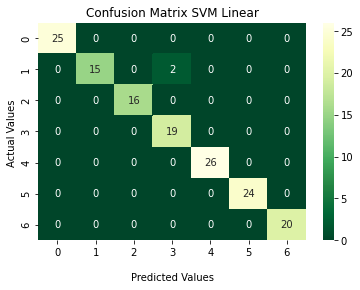

In [ ]:
cmL = sns.heatmap(cm_L, annot=True, cmap='YlGn_r')

cmL.set_title('Confusion Matrix SVM Linear')
cmL.set_xlabel('\nPredicted Values')
cmL.set_ylabel('Actual Values ')

plt.show()

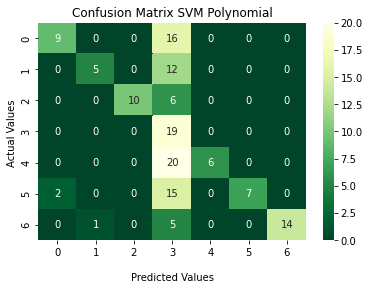

In [ ]:
cmP = sns.heatmap(cm_P, annot=True, cmap='YlGn_r')

cmP.set_title('Confusion Matrix SVM Polynomial')
cmP.set_xlabel('\nPredicted Values')
cmP.set_ylabel('Actual Values ')

plt.show()

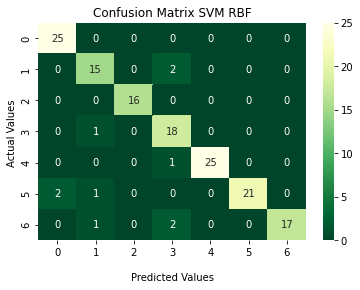

In [ ]:
cmR = sns.heatmap(cm_R, annot=True, cmap='YlGn_r')

cmR.set_title('Confusion Matrix SVM RBF')
cmR.set_xlabel('\nPredicted Values')
cmR.set_ylabel('Actual Values ')

plt.show()